# Taller de Inteligencia Artificial: Optimización de Costos
En este taller, continuando con la estructura anterior, nos enfocaremos en cómo aplicar técnicas analíticas y estadísticas para optimizar costos en una empresa. Utilizaremos el mismo conjunto de datos artificiales generado anteriormente, que simula transacciones de clientes, para identificar productos que tienen menor impacto en las ventas y sugerir su remoción.

Nuestro objetivo es:

- Eliminar datos duplicados y vacíos para garantizar la calidad de los datos.
- Analizar y explorar los datos para comprender el comportamiento de las ventas y los costos asociados.
- Desarrollar un modelo analítico que identifique los productos menos rentables o con menor impacto en las ventas.
- Proporcionar visualizaciones que faciliten la comprensión de los resultados.

## 1. Preparación del Entorno
### 1.1. Importación de Librerías Necesarias
En esta sección, prepararemos el entorno de trabajo importando las librerías necesarias y cargando el conjunto de datos desde un archivo CSV. De igual manera instalaremos la librerías y dependencias necesarias en caso de ser necesario

In [1]:
#!pip install seaborn

In [2]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns



### 1.2. Carga del Conjunto de Datos
Cargamos el archivo CSV que contiene los datos de las transacciones. Asegúrate de que el archivo datos_transacciones.csv esté en el mismo directorio que este notebook o especifica la ruta correcta.

In [3]:
# Cargamos el conjunto de datos desde un archivo CSV
df = pd.read_csv('./data/taller_2_datos_transacciones.csv')

# Visualizamos las primeras filas del DataFrame
df.head()


,ID Cliente,Nombre del Cliente,ID Producto,Nombre del Producto,Cantidad,Valor,Costo,Fecha de Compra,Canal de Venta,Segmento de Mercado,Historial de Compras,Preferencias del Cliente
0,193,Miguel Díaz,1017,Refrigerador,1,821.58,41.36,2024-01-31 10:40:45.234587,Catálogo,Estudiantes,1,Gastronomía
1,775,Andrea Rodríguez,1004,Cafetera,3,1962.52,284.70,2024-11-05 10:40:45.234604,Tienda Física,Adultos,30,Moda
2,128,Pedro Suárez,1011,Horno,2,876.11,692.84,2023-11-26 10:40:45.234607,Aplicación Móvil,Empresas,35,Salud
3,968,Ana Vásquez,1028,Licuadora,1,3601.39,563.46,2023-06-09 10:40:45.234609,Catálogo,Estudiantes,47,Entretenimiento
4,374,Lucía Flores,1009,Secadora,6,73.40,2047.00,2024-05-07 10:40:45.234611,Teléfono,Tercera Edad,12,Hogar


Nota: Si deseas generar los datos artificiales y guardarlos en un archivo CSV, puedes utilizar el siguiente código en un script aparte:

In [5]:
# Generación de datos artificiales y guardado en un archivo CSV
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Listas de datos para la generación
nombres_clientes = ['Carlos', 'María', 'Luis', 'Ana', 'Jorge', 'Sofía', 'Fernando', 'Lucía', 'Diego', 'Valentina',
                    'Miguel', 'Isabella', 'Juan', 'Camila', 'Pedro', 'Andrea', 'José', 'Daniela', 'Manuel', 'Alejandra']
apellidos = ['García', 'Rodríguez', 'López', 'Martínez', 'González', 'Pérez', 'Sánchez', 'Ramírez', 'Torres', 'Flores',
             'Rivera', 'Gómez', 'Díaz', 'Vásquez', 'Morales', 'Herrera', 'Suárez', 'Romero', 'Sosa', 'Reyes']
nombres_productos = ['Televisor', 'Computadora', 'Smartphone', 'Tablet', 'Auriculares', 'Cámara', 'Impresora', 'Monitor',
                     'Teclado', 'Ratón', 'Consola de Videojuegos', 'Parlantes', 'Reloj Inteligente', 'Laptop', 'Router',
                     'Disco Duro', 'Memoria USB', 'Microondas', 'Refrigerador', 'Lavadora', 'Secadora', 'Cafetera',
                     'Licuadora', 'Ventilador', 'Aire Acondicionado', 'Calentador', 'Horno', 'Batidora', 'Tostadora',
                     'Plancha']
canales_venta = ['Tienda Física', 'En Línea', 'Teléfono', 'Aplicación Móvil', 'Catálogo', 'Ventas Directas']
segmentos_mercado = ['Jóvenes', 'Adultos', 'Empresas', 'Estudiantes', 'Hogares', 'Profesionales', 'Tercera Edad']
preferencias_cliente = ['Tecnología', 'Moda', 'Deportes', 'Hogar', 'Entretenimiento', 'Salud', 'Belleza', 'Automotriz', 'Viajes', 'Gastronomía']

# Generamos el número de registros
num_registros = 5000

# Generamos listas de IDs únicos para clientes y productos
ids_clientes = np.arange(1, 1001)  # 1000 clientes únicos
ids_productos = np.arange(1001, 1031)  # 30 productos únicos

# Creamos el DataFrame con los datos simulados
data = {
    'ID Cliente': random.choices(ids_clientes, k=num_registros),
    'Nombre del Cliente': [random.choice(nombres_clientes) + ' ' + random.choice(apellidos) for _ in range(num_registros)],
    'ID Producto': random.choices(ids_productos, k=num_registros),
    'Nombre del Producto': random.choices(nombres_productos, k=num_registros),
    'Cantidad': np.random.randint(1, 10, size=num_registros),
    'Valor': np.round(np.random.uniform(20.0, 5000.0, size=num_registros), 2),
    'Costo': np.round(np.random.uniform(10.0, 3000.0, size=num_registros), 2),
    'Fecha de Compra': [datetime.now() - timedelta(days=random.randint(0, 730)) for _ in range(num_registros)],
    'Canal de Venta': random.choices(canales_venta, k=num_registros),
    'Segmento de Mercado': random.choices(segmentos_mercado, k=num_registros),
    'Historial de Compras': [random.randint(1, 50) for _ in range(num_registros)],
    'Preferencias del Cliente': random.choices(preferencias_cliente, k=num_registros),
}

df = pd.DataFrame(data)

# Guardamos el DataFrame en un archivo CSV
df.to_csv('datos_transacciones.csv', index=False)


## 2. Preprocesamiento de Datos
Realizaremos la limpieza de los datos, eliminando duplicados y valores vacíos para asegurar la calidad del conjunto de datos.

### 2.1. Verificación y Eliminación de Datos Vacíos

Comprobamos si existen valores nulos en el DataFrame y los eliminamos si es necesario. Es importante eliminar o imputar valores nulos para evitar problemas en el análisis posterior.



In [4]:
# Verificamos si existen valores nulos en el DataFrame
print("Valores nulos antes de la limpieza:")
print(df.isnull().sum())

# Eliminamos filas con valores nulos (en este caso, no debería haber)
df = df.dropna()

# Verificamos nuevamente
print("Valores nulos después de la limpieza:")
print(df.isnull().sum())


Valores nulos antes de la limpieza:
ID Cliente                  0
Nombre del Cliente          0
ID Producto                 0
Nombre del Producto         0
Cantidad                    0
Valor                       0
Costo                       0
Fecha de Compra             0
Canal de Venta              0
Segmento de Mercado         0
Historial de Compras        0
Preferencias del Cliente    0
dtype: int64
Valores nulos después de la limpieza:
ID Cliente                  0
Nombre del Cliente          0
ID Producto                 0
Nombre del Producto         0
Cantidad                    0
Valor                       0
Costo                       0
Fecha de Compra             0
Canal de Venta              0
Segmento de Mercado         0
Historial de Compras        0
Preferencias del Cliente    0
dtype: int64


### 2.2. Verificación y Eliminación de Datos Duplicados
Identificamos y eliminamos filas duplicadas para evitar redundancias en los datos. Los datos duplicados pueden sesgar los resultados del análisis, por lo que es esencial eliminarlos.

In [5]:
# Verificamos si existen filas duplicadas
duplicados = df.duplicated().sum()
print(f"Filas duplicadas antes de la limpieza: {duplicados}")

# Eliminamos filas duplicadas
df = df.drop_duplicates()

# Verificamos nuevamente
duplicados = df.duplicated().sum()
print(f"Filas duplicadas después de la limpieza: {duplicados}")


Filas duplicadas antes de la limpieza: 0
Filas duplicadas después de la limpieza: 0


## 3. Análisis y Exploración de Datos
Realizaremos un análisis exploratorio para comprender mejor el comportamiento de las ventas y los costos asociados a cada producto.

### 3.1. Análisis de Ventas por Producto

Calculamos y visualizamos las ventas totales por producto. Esto nos permite identificar los productos más vendidos y aquellos con menor participación en las ventas totales. Esto nos permite identificar los productos más vendidos y aquellos con menor participación en las ventas totales

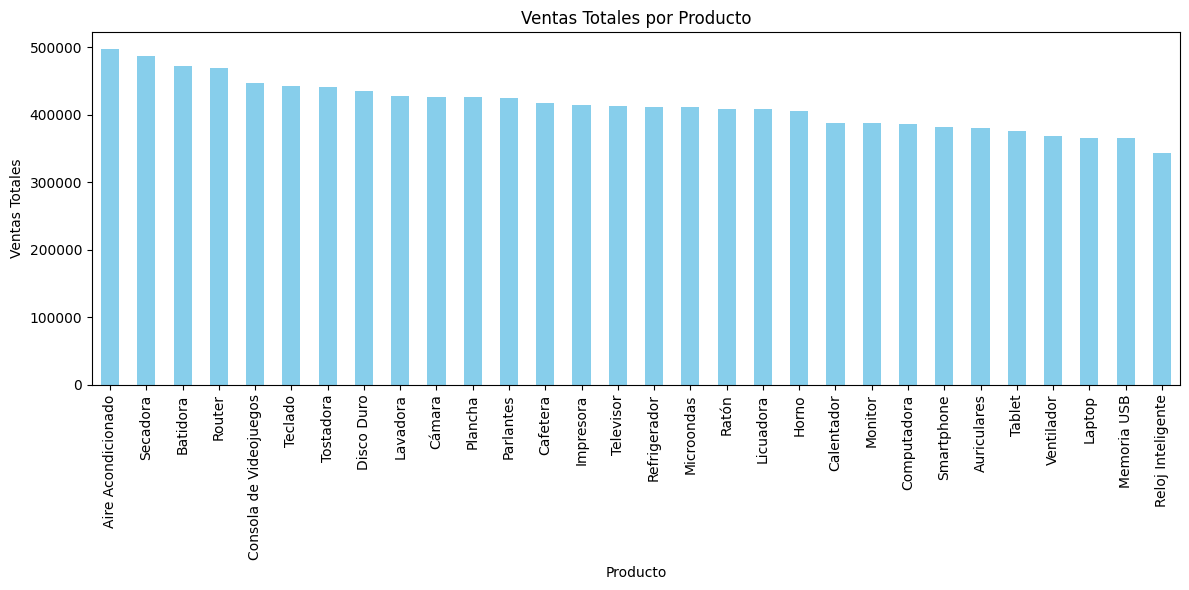

In [6]:
# Calculamos las ventas totales por producto
ventas_por_producto = df.groupby('Nombre del Producto')['Valor'].sum().sort_values(ascending=False)

# Visualizamos las ventas por producto
plt.figure(figsize=(12, 6))
ventas_por_producto.plot(kind='bar', color='skyblue')
plt.title('Ventas Totales por Producto')
plt.xlabel('Producto')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### 3.2. Análisis de Costos por Producto

Calculamos y visualizamos los costos totales por producto. Nos ayuda a entender cuánto cuesta mantener cada producto y cómo se compara con las ventas generadas. Nos ayuda a entender cuánto cuesta mantener cada producto y cómo se compara con las ventas generadas.

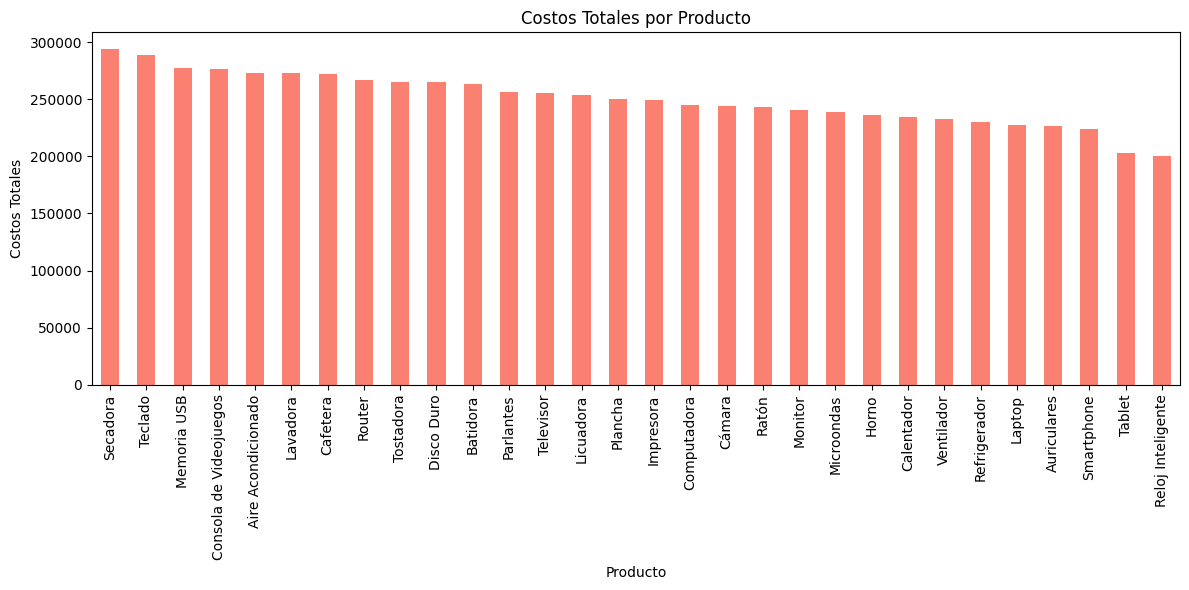

In [7]:
# Calculamos los costos totales por producto
costos_por_producto = df.groupby('Nombre del Producto')['Costo'].sum().sort_values(ascending=False)

# Visualizamos los costos por producto
plt.figure(figsize=(12, 6))
costos_por_producto.plot(kind='bar', color='salmon')
plt.title('Costos Totales por Producto')
plt.xlabel('Producto')
plt.ylabel('Costos Totales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### 3.3. Análisis de Rentabilidad por Producto
Calculamos y visualizamos la rentabilidad por producto. La rentabilidad es un indicador clave para determinar qué productos aportan más ganancias al negocio.

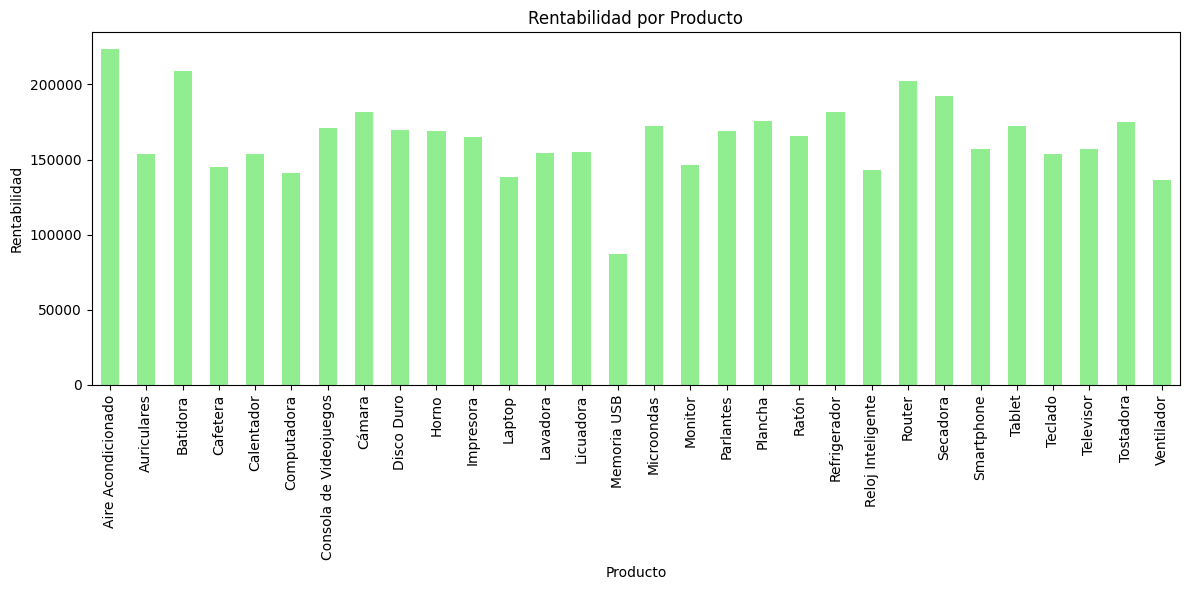

In [8]:
# Calculamos la rentabilidad (Ingresos - Costos) por producto
rentabilidad_por_producto = ventas_por_producto - costos_por_producto

# Visualizamos la rentabilidad por producto
plt.figure(figsize=(12, 6))
rentabilidad_por_producto.plot(kind='bar', color='lightgreen')
plt.title('Rentabilidad por Producto')
plt.xlabel('Producto')
plt.ylabel('Rentabilidad')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## 4. Modelo Analítico para Optimización de Costos
En esta sección, desarrollaremos un modelo analítico y estadístico para identificar los productos que tienen menor impacto en las ventas y sugerir su remoción para optimizar costos.

### 4.1. Identificación de Productos con Menor Impacto
#### 4.1.1. Productos con Menores Ventas
Identificamos los productos con las ventas totales más bajas. Estos productos pueden ser candidatos para reevaluación o remoción debido a su baja contribución en ventas.

In [9]:
# Obtenemos los productos con menores ventas totales
productos_menores_ventas = ventas_por_producto.tail(5)

print("Productos con menores ventas totales:")
print(productos_menores_ventas)


Productos con menores ventas totales:
Nombre del Producto
Tablet               375856.75
Ventilador           368813.99
Laptop               365315.24
Memoria USB          364978.25
Reloj Inteligente    342726.49
Name: Valor, dtype: float64


#### 4.1.2. Productos con Menor Rentabilidad
Identificamos los productos menos rentables. Productos con baja o negativa rentabilidad afectan directamente las ganancias de la empresa.

In [10]:
# Obtenemos los productos con menor rentabilidad
productos_menor_rentabilidad = rentabilidad_por_producto.sort_values().head(5)

print("Productos con menor rentabilidad:")
print(productos_menor_rentabilidad)


Productos con menor rentabilidad:
Nombre del Producto
Memoria USB           87255.99
Ventilador           136523.45
Laptop               138217.04
Computadora          140829.16
Reloj Inteligente    142809.38
dtype: float64


#### 4.1.3. Visualización de Productos con Menor Impacto
Visualizamos los productos con menores ventas y rentabilidad. Las gráficas nos permiten identificar visualmente los productos menos performantes.

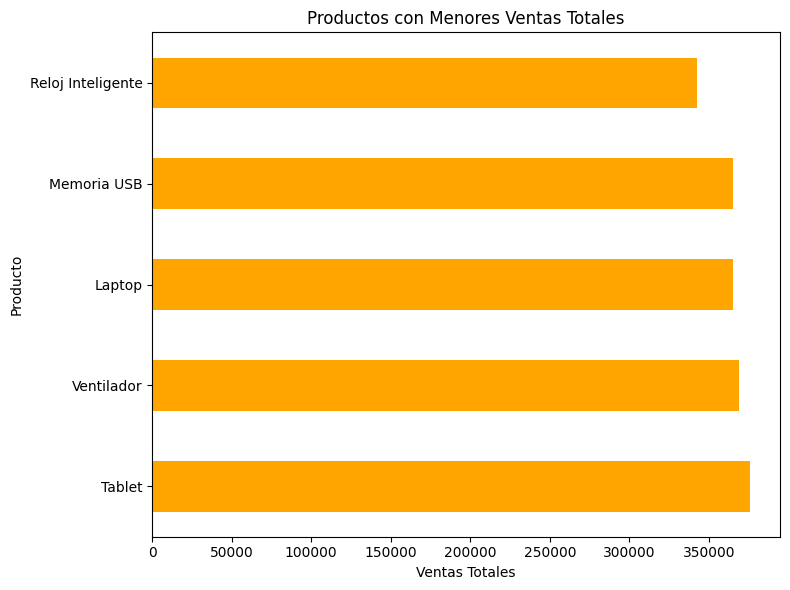

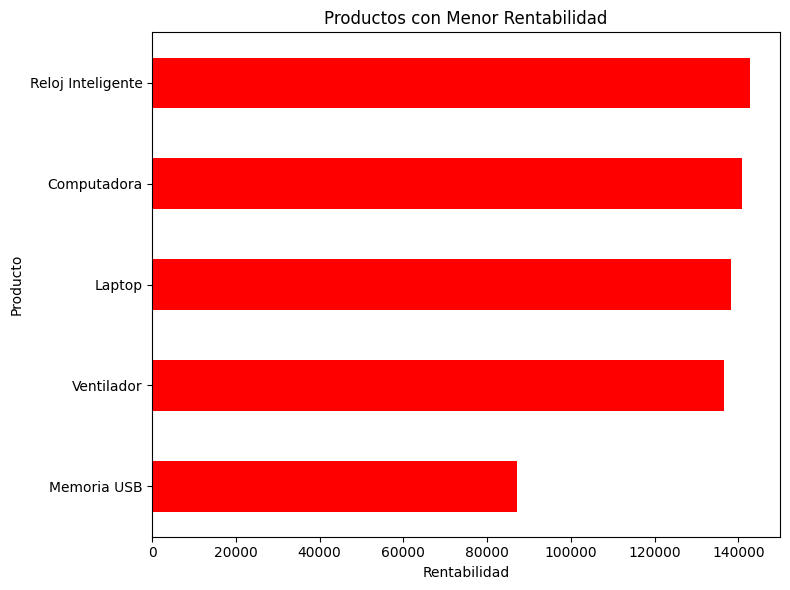

In [11]:
# Visualizamos los productos con menores ventas
plt.figure(figsize=(8, 6))
productos_menores_ventas.plot(kind='barh', color='orange')
plt.title('Productos con Menores Ventas Totales')
plt.xlabel('Ventas Totales')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

# Visualizamos los productos con menor rentabilidad
plt.figure(figsize=(8, 6))
productos_menor_rentabilidad.plot(kind='barh', color='red')
plt.title('Productos con Menor Rentabilidad')
plt.xlabel('Rentabilidad')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()


#### 4.1.4. Análisis de la Contribución de los Productos - Análisis de Pareto de Ventas
Realizaremos un análisis de Pareto (80/20) para identificar qué productos generan la mayor parte de las ventas y cuáles contribuyen menos. 

<Figure size 1200x600 with 0 Axes>

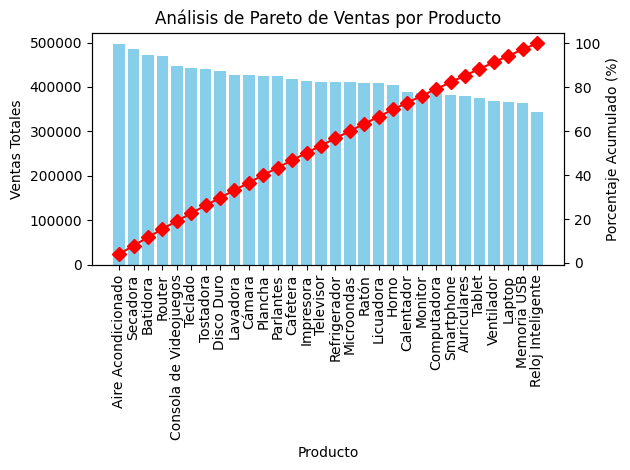

In [12]:
# Ordenamos las ventas por producto de mayor a menor
ventas_ordenadas = ventas_por_producto.sort_values(ascending=False)

# Calculamos el porcentaje acumulado de ventas
porcentaje_acumulado = ventas_ordenadas.cumsum() / ventas_ordenadas.sum() * 100

# Visualizamos el análisis de Pareto
plt.figure(figsize=(12, 6))
fig, ax = plt.subplots()
ax.bar(ventas_ordenadas.index, ventas_ordenadas.values, color='skyblue')
ax2 = ax.twinx()
ax2.plot(ventas_ordenadas.index, porcentaje_acumulado.values, color='red', marker='D', ms=7)
ax.set_xlabel('Producto')
ax.set_ylabel('Ventas Totales')
ax2.set_ylabel('Porcentaje Acumulado (%)')
plt.title('Análisis de Pareto de Ventas por Producto')
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()


#### 4.1.5 Identificación de Productos de Baja Contribución
Estos productos tienen una contribución marginal en las ventas totales y podrían ser reevaluados.

In [14]:
# Combinar las listas de productos con menor rentabilidad y baja contribución
productos_a_considerar = set(productos_menor_rentabilidad.index).union(set(productos_menor_rentabilidad))

print("Productos sugeridos para remoción o reevaluación:")
print(list(productos_a_considerar))


Productos sugeridos para remoción o reevaluación:
['Reloj Inteligente', 'Memoria USB', 138217.03999999998, 'Computadora', 136523.44999999998, 'Ventilador', 'Laptop', 142809.37999999998, 87255.98999999999, 140829.16000000003]


### 4.2. Análisis de Regresión para Predicción de Rentabilidad
En esta sección, desarrollaremos un modelo de regresión lineal múltiple para predecir la rentabilidad de los productos en función de varias características. Esto nos permitirá entender qué variables influyen más en la rentabilidad y predecir el desempeño de productos nuevos o existentes.

#### 4.2.1. Preparación de Datos para el Modelo de Regresión
Antes de entrenar el modelo, debemos preparar los datos, seleccionando las variables relevantes y transformando las variables categóricas en numéricas.

In [15]:
# Seleccionamos las características relevantes
caracteristicas = ['Cantidad', 'Valor', 'Costo', 'Canal de Venta', 'Segmento de Mercado', 'Preferencias del Cliente']

# Creamos un DataFrame con las características y la variable objetivo (Rentabilidad)
df_modelo = df[caracteristicas].copy()

# Calculamos la rentabilidad (Valor - Costo)
df_modelo['Rentabilidad'] = df['Valor'] - df['Costo']

# Transformamos variables categóricas en numéricas utilizando One-Hot Encoding
df_modelo_encoded = pd.get_dummies(df_modelo, columns=['Canal de Venta', 'Segmento de Mercado', 'Preferencias del Cliente'])

# Visualizamos las primeras filas del DataFrame preparado
df_modelo_encoded.head()


,Cantidad,Valor,Costo,Rentabilidad,Canal de Venta_Aplicación Móvil,Canal de Venta_Catálogo,Canal de Venta_En Línea,Canal de Venta_Teléfono,Canal de Venta_Tienda Física,Canal de Venta_Ventas Directas,...,Preferencias del Cliente_Automotriz,Preferencias del Cliente_Belleza,Preferencias del Cliente_Deportes,Preferencias del Cliente_Entretenimiento,Preferencias del Cliente_Gastronomía,Preferencias del Cliente_Hogar,Preferencias del Cliente_Moda,Preferencias del Cliente_Salud,Preferencias del Cliente_Tecnología,Preferencias del Cliente_Viajes
0,1,821.58,41.36,780.22,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3,1962.52,284.70,1677.82,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,2,876.11,692.84,183.27,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,3601.39,563.46,3037.93,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,6,73.40,2047.00,-1973.60,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


#### 4.2.2. División de Datos en Conjuntos de Entrenamiento y Prueba
Dividimos los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo.

In [16]:
from sklearn.model_selection import train_test_split

# Definimos las características (X) y la variable objetivo (y)
X = df_modelo_encoded.drop('Rentabilidad', axis=1)
y = df_modelo_encoded['Rentabilidad']

# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### 4.2.3. Entrenamiento del Modelo de Regresión Lineal
Entrenamos un modelo de regresión lineal múltiple utilizando los datos de entrenamiento

In [17]:
from sklearn.linear_model import LinearRegression

# Creamos y entrenamos el modelo
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)


LinearRegression()

#### 4.2.4 Evaluación del Modelo de Regresión
Evaluamos el rendimiento del modelo utilizando métricas como el R-cuadrado y el error cuadrático medio.

In [18]:
from sklearn.metrics import r2_score, mean_squared_error

# Realizamos predicciones en el conjunto de prueba
y_pred = modelo_regresion.predict(X_test)

# Calculamos las métricas
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Coeficiente de determinación (R^2): {r2:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")


Coeficiente de determinación (R^2): 1.00
Raíz del Error Cuadrático Medio (RMSE): 0.00


### 4.3. Análisis de Clústeres para Agrupación de Productos
En esta sección, aplicaremos técnicas de clustering para agrupar productos basados en características como ventas, costos y rentabilidad. Esto nos permitirá identificar grupos de productos con comportamientos similares y tomar acciones específicas.

#### 4.3.1. Preparación de Datos para Clustering
Preparamos los datos agregando información a nivel de producto y normalizando las variables.

In [19]:
# Calculamos ventas totales, costos totales y rentabilidad por producto
datos_productos = df.groupby('Nombre del Producto').agg({
    'Valor': 'sum',
    'Costo': 'sum',
    'Cantidad': 'sum'
}).rename(columns={'Valor': 'Ventas Totales', 'Costo': 'Costos Totales', 'Cantidad': 'Cantidad Vendida'})

# Calculamos la rentabilidad
datos_productos['Rentabilidad'] = datos_productos['Ventas Totales'] - datos_productos['Costos Totales']

# Visualizamos los datos
datos_productos.head()


,Ventas Totales,Costos Totales,Cantidad Vendida,Rentabilidad
Nombre del Producto,,,,
Aire Acondicionado,496934.45,273375.42,908,223559.03
Auriculares,380528.60,226855.95,740,153672.65
Batidora,472008.10,263000.19,907,209007.91
Cafetera,416890.54,272071.23,828,144819.31
Calentador,387710.05,234248.19,759,153461.86


#### 4.3.2. Normalización de las Variables
Normalizamos las variables para que todas tengan la misma escala, lo cual es necesario para los algoritmos de clustering.

In [20]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos las características para el clustering
caracteristicas_clustering = ['Ventas Totales', 'Costos Totales', 'Cantidad Vendida', 'Rentabilidad']

# Aplicamos la normalización
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(datos_productos[caracteristicas_clustering])

# Convertimos a DataFrame
datos_normalizados = pd.DataFrame(datos_normalizados, index=datos_productos.index, columns=caracteristicas_clustering)

# Visualizamos los datos normalizados
datos_normalizados.head()


,Ventas Totales,Costos Totales,Cantidad Vendida,Rentabilidad
Nombre del Producto,,,,
Aire Acondicionado,2.269438,1.027202,1.289718,2.396513
Auriculares,-0.917184,-1.028309,-1.371018,-0.411055
Batidora,1.587076,0.568762,1.273880,1.811946
Cafetera,0.078228,0.969575,0.022701,-0.766724
Calentador,-0.720591,-0.701675,-1.070102,-0.419524


#### 4.3.3. Determinación del Número Óptimo de Clústeres
Utilizamos el método del codo (Elbow Method) para determinar el número óptimo de clústeres. El punto donde la disminución del SSE se vuelve menos pronunciada indica el número óptimo de clústeres.

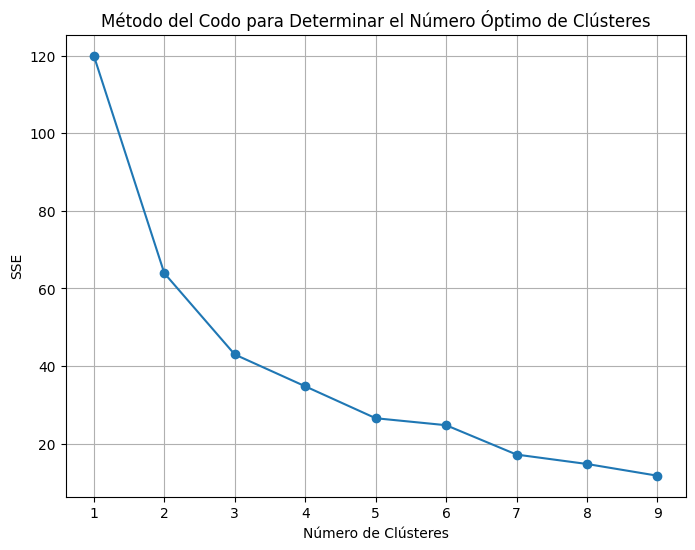

In [21]:
from sklearn.cluster import KMeans

# Lista para almacenar la suma de errores cuadráticos (SSE) para cada número de clústeres
sse = []

# Probamos con diferentes números de clústeres
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(datos_normalizados)
    sse.append(kmeans.inertia_)

# Visualizamos el gráfico del método del codo
plt.figure(figsize=(8, 6))
plt.plot(K, sse, marker='o')
plt.title('Método del Codo para Determinar el Número Óptimo de Clústeres')
plt.xlabel('Número de Clústeres')
plt.ylabel('SSE')
plt.xticks(K)
plt.grid(True)
plt.show()


#### 4.3.4. Aplicación del Algoritmo de Clustering
Basándonos en el gráfico anterior, seleccionamos el número de clústeres y aplicamos K-Means.

In [22]:
# Suponiendo que el número óptimo de clústeres es 3
k_optimo = 3

# Creamos y ajustamos el modelo K-Means
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
kmeans.fit(datos_normalizados)

# Asignamos los clústeres a los productos
datos_productos['Cluster'] = kmeans.labels_

# Visualizamos los productos con sus clústeres
datos_productos.head()


,Ventas Totales,Costos Totales,Cantidad Vendida,Rentabilidad,Cluster
Nombre del Producto,,,,,
Aire Acondicionado,496934.45,273375.42,908,223559.03,2
Auriculares,380528.60,226855.95,740,153672.65,0
Batidora,472008.10,263000.19,907,209007.91,2
Cafetera,416890.54,272071.23,828,144819.31,1
Calentador,387710.05,234248.19,759,153461.86,0


#### 4.3.5. Análisis de los Clústeres
Analizamos las características de cada clúster para entender los patrones y comportamientos.

In [23]:
# Calculamos estadísticas descriptivas por clúster
estadisticas_cluster = datos_productos.groupby('Cluster').mean()

# Visualizamos las estadísticas
estadisticas_cluster


,Ventas Totales,Costos Totales,Cantidad Vendida,Rentabilidad
Cluster,,,,
0,373989.312,231056.343,767.500000,142932.969
1,420656.582,254666.754,834.933333,165989.828
2,474249.106,274656.326,919.600000,199592.780


#### 4.3.6. Visualización de los Clústeres
Utilizamos gráficos para visualizar los clústeres y sus características.

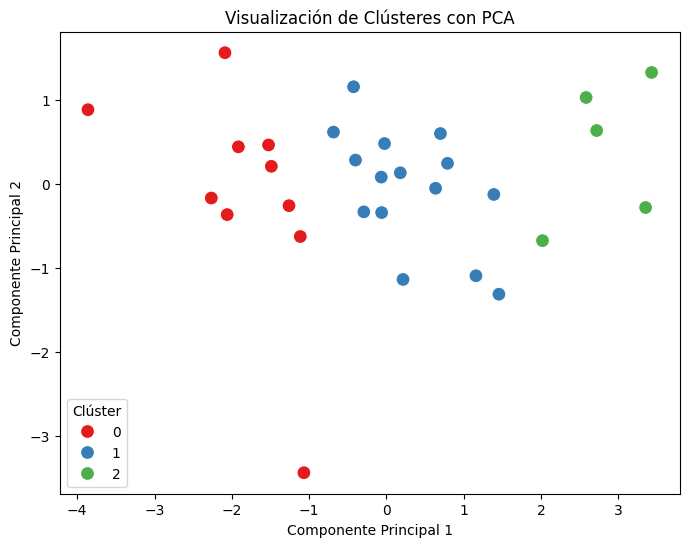

In [24]:
# Visualización en dos dimensiones utilizando PCA
from sklearn.decomposition import PCA

# Reducimos la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
componentes_pca = pca.fit_transform(datos_normalizados)

# Convertimos a DataFrame
df_pca = pd.DataFrame(data=componentes_pca, columns=['Componente 1', 'Componente 2'], index=datos_productos.index)

# Agregamos los clústeres
df_pca['Cluster'] = datos_productos['Cluster']

# Visualizamos los clústeres
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='Componente 1', y='Componente 2', hue='Cluster', palette='Set1', s=100)
plt.title('Visualización de Clústeres con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clúster')
plt.show()


#### 4.3.7. Interpretación y Uso de los Clústeres para la Toma de Decisiones
Interpretamos cada clúster y sugerimos acciones específicas.

- **Clúster 0**: Productos con altas ventas y rentabilidad. Se recomienda mantener y potenciar estos productos.
- **Clúster 1**: Productos con ventas y rentabilidad medias. Se puede considerar estrategias para mejorar su desempeño.
- **Clúster 2**: Productos con bajas ventas y rentabilidad. Candidatos para remoción o reevaluación.

In [25]:
# Listamos los productos en el clúster de bajo rendimiento
productos_bajo_rendimiento = datos_productos[datos_productos['Cluster'] == 2].index.tolist()

print("Productos en el clúster de bajo rendimiento:")
print(productos_bajo_rendimiento)


Productos en el clúster de bajo rendimiento:
['Aire Acondicionado', 'Batidora', 'Consola de Videojuegos', 'Router', 'Secadora']


## 5. Sugerencias Mejoradas para Optimización de Costos
Basándonos en los modelos analíticos más complejos, podemos proporcionar recomendaciones más precisas.

### 5.1. Integración de Resultados de los Modelos
Combinamos los resultados del análisis de regresión y clustering para identificar productos que consistentemente muestran bajo rendimiento.

In [29]:
# Identificamos productos con rentabilidad predicha baja
rentabilidad_predicha = modelo_regresion.predict(X)
umbral_rentabilidad_baja = np.percentile(rentabilidad_predicha, 20)  # 20% más bajo

productos_rentabilidad_baja = X.index[rentabilidad_predicha <= umbral_rentabilidad_baja].tolist()

# Intersectamos con productos del clúster de bajo rendimiento
productos_a_considerar = set(productos_rentabilidad_baja).intersection(set(productos_bajo_rendimiento))

print("Productos sugeridos para remoción o reevaluación (según ambos modelos):")
print(productos_bajo_rendimiento)


Productos sugeridos para remoción o reevaluación (según ambos modelos):
['Aire Acondicionado', 'Batidora', 'Consola de Videojuegos', 'Router', 'Secadora']


### 5.2. Visualización de los Productos Identificados
Visualizamos estos productos para entender mejor su posición.

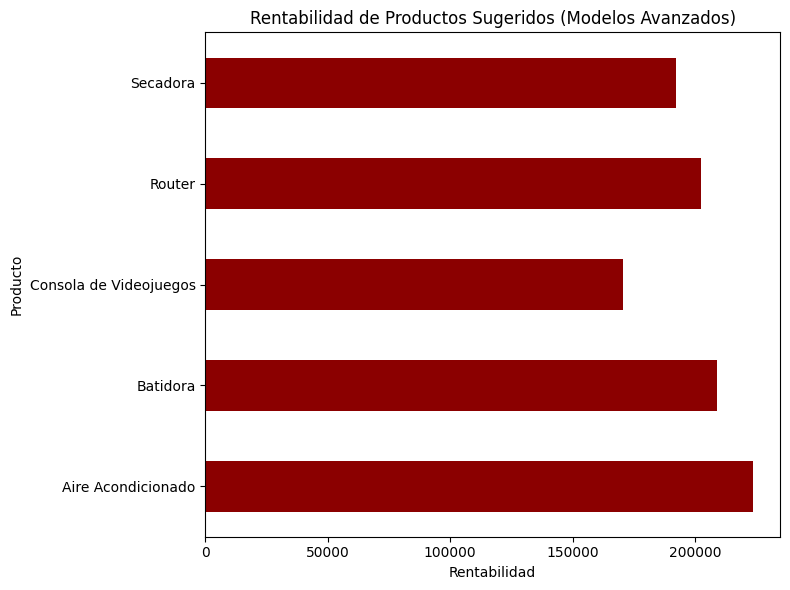

In [31]:
# Visualizamos la rentabilidad real de los productos a considerar
rentabilidad_productos_a_considerar = rentabilidad_por_producto.loc[productos_bajo_rendimiento]

plt.figure(figsize=(8, 6))
rentabilidad_productos_a_considerar.plot(kind='barh', color='darkred')
plt.title('Rentabilidad de Productos Sugeridos (Modelos Avanzados)')
plt.xlabel('Rentabilidad')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()


## 6. Conclusiones y Recomendaciones (Actualizadas)
- **Análisis Profundo de Rentabilidad**: El modelo de regresión nos permitió identificar qué variables influyen más en la rentabilidad y predecir el desempeño de productos.

- **Agrupación de Productos**: El análisis de clústeres nos ayudó a segmentar los productos en grupos con características similares, facilitando la implementación de estrategias específicas.

- **Identificación de Productos Críticos**: Al combinar ambos modelos, identificamos productos que consistentemente presentan bajo rendimiento y son candidatos claros para remoción o reevaluación.

**Acciones Recomendadas**:

- **Remoción o Mejora de Productos**: Considerar eliminar productos con bajo desempeño o implementar estrategias para mejorar su rentabilidad.
- **Enfoque en Productos Rentables**: Destinar más recursos y esfuerzos de marketing a los productos identificados como más rentables.
**Reevaluación de Estrategias Comerciales: Analizar los canales de venta, segmentos de mercado y preferencias de cliente que afectan la rentabilidad.